# Exploring-Fashion-MNIST
***

### About Dataset [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

#### Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as `x = i * 28 + j`, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a `28 x 28` matrix.
For example, `pixel31` indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

#### Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

**Dataset is also available in `tensorflow.keras.datasets.fashion_mnist`**

***
### Use Case:
I'm going to use this dataset with labels to try and predict which class the item belongs to based on the input image.

For this, I'm going to use, **Dense Neural Networks** and later on **Convolutional Neural Networks**.
***

### Necessary Imports

Let's start with our import of TensorFlow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

/Users/tkmakom/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.14.0


In [6]:
# To stop kernels from restarting
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


### Loading dataset
The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [8]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
X = training_images[:, 1:]
y = training_images[:, :1]

### Visualizing sample image

9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

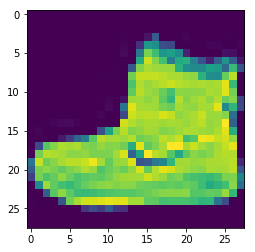

In [25]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])
plt.show()

### Normalizing dataset

In [11]:
training_images = training_images / 255.0
test_images = test_images / 255.0


In [12]:
training_images_flatten = training_images.reshape((training_images.shape[0], -1))
test_images_flatten = test_images.reshape((test_images.shape[0], -1))


### Dense Neural Network


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training

In [15]:
epochs = 10
history = model.fit(training_images, training_labels, epochs=epochs, validation_split= 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 93us/sample - loss: 0.5099 - acc: 0.8187 - val_loss: 0.4031 - val_acc: 0.8548
Epoch 2/10
54000/54000 [==============================] - 5s 87us/sample - loss: 0.3765 - acc: 0.8648 - val_loss: 0.3630 - val_acc: 0.8717
Epoch 3/10
54000/54000 [==============================] - 5s 86us/sample - loss: 0.3381 - acc: 0.8768 - val_loss: 0.3424 - val_acc: 0.8750
Epoch 4/10
54000/54000 [==============================] - 5s 89us/sample - loss: 0.3126 - acc: 0.8856 - val_loss: 0.3468 - val_acc: 0.8783
Epoch 5/10
54000/54000 [==============================] - 5s 87us/sample - loss: 0.2958 - acc: 0.8903 - val_loss: 0.3291 - val_acc: 0.8775
Epoch 6/10
54000/54000 [==============================] - 5s 84us/sample - loss: 0.2812 - acc: 0.8960 - val_loss: 0.3368 - val_acc: 0.8843
Epoch 7/10
54000/54000 [==============================] - 5s 86us/sample - loss: 0.2694 - acc: 0.9004 - val_loss: 0.3

### Evaluating Performance

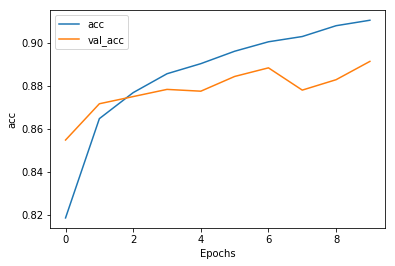

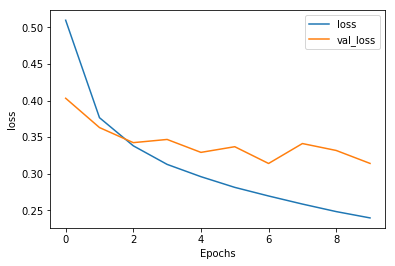

In [17]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


plot_graphs(history, 'acc')
plot_graphs(history, 'loss')


In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3288 - acc: 0.8868


[0.3287874073982239, 0.8868]

### Convolutional Neural Networks

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,026
Trainable params: 1,386,026
Non-trainable params: 0
_________________________________________________________________


In [21]:
train_images_conv = training_images.reshape(training_images.shape[0],
                                            training_images.shape[1],
                                            training_images.shape[2],
                                            1)
test_images_conv = test_images.reshape(test_images.shape[0],
                                       test_images.shape[1],
                                       test_images.shape[2],
                                       1)


In [22]:
epochs = 10
history = model.fit(train_images_conv, training_labels, epochs=epochs, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 29s 534us/sample - loss: 0.4142 - acc: 0.8520 - val_loss: 0.3025 - val_acc: 0.8898
Epoch 2/10
54000/54000 [==============================] - 32s 585us/sample - loss: 0.2655 - acc: 0.9031 - val_loss: 0.2882 - val_acc: 0.8980
Epoch 3/10
54000/54000 [==============================] - 32s 588us/sample - loss: 0.2106 - acc: 0.9227 - val_loss: 0.2719 - val_acc: 0.9033
Epoch 4/10
54000/54000 [==============================] - 30s 562us/sample - loss: 0.1681 - acc: 0.9389 - val_loss: 0.2819 - val_acc: 0.9038
Epoch 5/10
54000/54000 [==============================] - 29s 528us/sample - loss: 0.1346 - acc: 0.9509 - val_loss: 0.3143 - val_acc: 0.8985
Epoch 6/10
54000/54000 [==============================] - 28s 513us/sample - loss: 0.1043 - acc: 0.9623 - val_loss: 0.3144 - val_acc: 0.9077
Epoch 7/10
54000/54000 [==============================] - 28s 521us/sample - loss: 0.0840 - acc: 0.9693 -

### Evaluating performance

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


plot_graphs(history, 'acc')
plot_graphs(history, 'loss')


In [ ]:
model.evaluate(test_images_conv, test_labels)

## Finish